In [7]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import sys


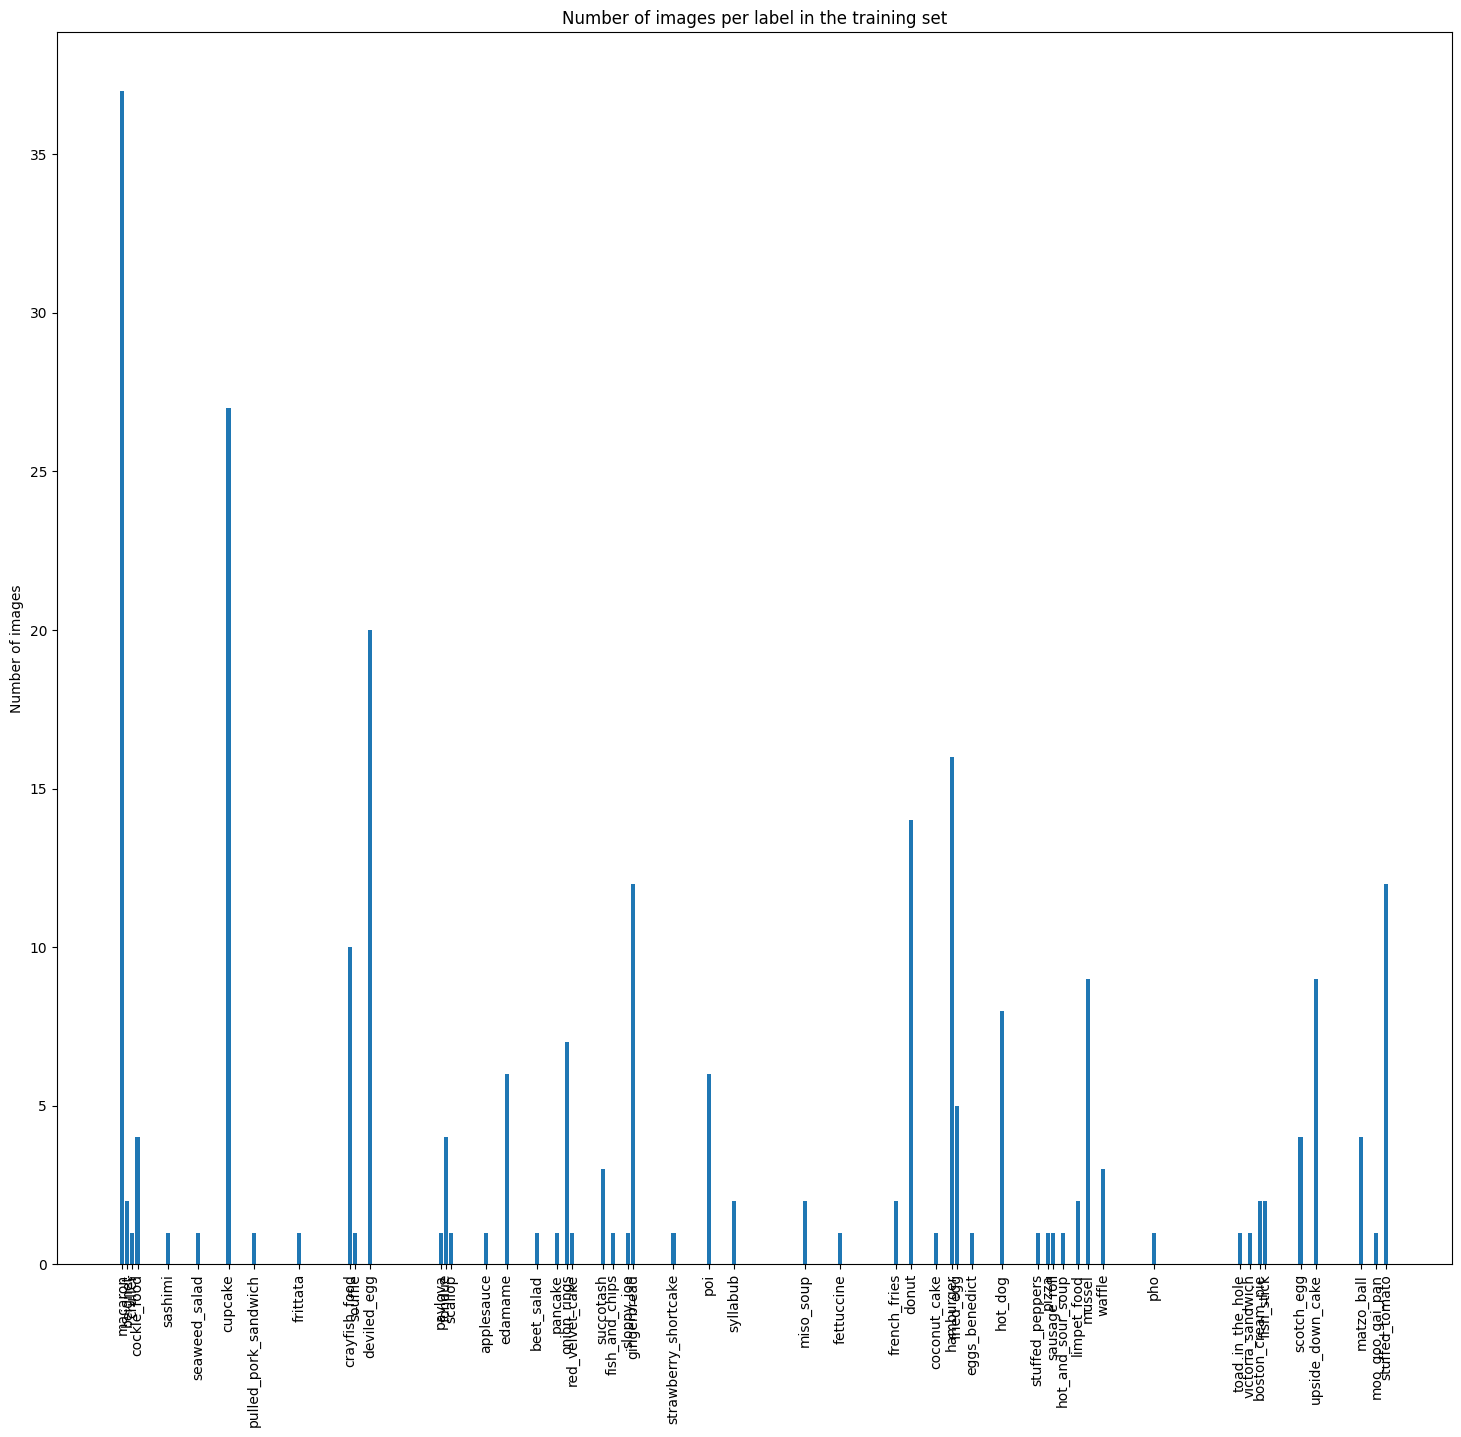

In [8]:
train_df = pd.read_csv('./ground_truth/my_iterative_train.csv')
food_name = pd.read_csv('./ground_truth/foods_names.csv').to_dict()['Food']
train_df = train_df[5020:]
image_path = './train_set/'

# count the number of image per label in the training set
label_count = train_df['label'].value_counts().sort_index()

# Plot histogram of images per label
plt.figure(figsize=(18, 6))
plt.bar(label_count.index, label_count.values, color='skyblue', edgecolor='black')
plt.xticks(label_count.index, [food_name[i] for i in label_count.index], rotation=90)
plt.ylabel('Number of Images')
plt.xlabel('Label')
plt.title('Number of Images per Label in the Training Set')
plt.tight_layout()
plt.show()

# Plot a boxplot for the distribution of image counts
plt.figure(figsize=(6, 8))
plt.boxplot(label_count.values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'))
plt.xlabel('Number of Images')
plt.title('Distribution of Image Counts per Label')
plt.grid(axis='x')
plt.show()

# Plot a pie chart for proportional representation of classes
top_labels = label_count.nlargest(10)  # Top 10 classes
other_count = label_count.sum() - top_labels.sum()
pie_data = pd.concat([top_labels, pd.Series({'Other': other_count})])  # Use pd.concat instead of .append()

plt.figure(figsize=(10, 10))
plt.pie(
    pie_data, 
    labels=pie_data.index.map(lambda x: food_name.get(x, x)), 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab20.colors
)
plt.title('Proportional Representation of Classes (Top 10 + Other)')
plt.tight_layout()
plt.show()


In [4]:
good_labels = [food_name[i] for i in label_count.index]
print(good_labels)
print(len(good_labels))

['macaron', 'beignet', 'cruller', 'cockle_food', 'sashimi', 'seaweed_salad', 'cupcake', 'pulled_pork_sandwich', 'frittata', 'crayfish_food', 'souffle', 'deviled_egg', 'pavlova', 'fondue', 'scallop', 'applesauce', 'edamame', 'beet_salad', 'pancake', 'onion_rings', 'red_velvet_cake', 'succotash', 'fish_and_chips', 'sloppy_joe', 'gingerbread', 'strawberry_shortcake', 'poi', 'syllabub', 'miso_soup', 'fettuccine', 'flan', 'french_fries', 'donut', 'coconut_cake', 'hamburger', 'fried_egg', 'eggs_benedict', 'hot_dog', 'stuffed_peppers', 'pizza', 'sausage_roll', 'chicken_quesadilla', 'hot_and_sour_soup', 'limpet_food', 'mussel', 'waffle', 'oyster', 'lobster_bisque', 'grilled_cheese_sandwich', 'pho', 'toad_in_the_hole', 'victoria_sandwich', 'boston_cream_pie', 'fish_stick', 'scotch_egg', 'upside_down_cake', 'matzo_ball', 'moo_goo_gai_pan', 'stuffed_tomato']
59
